In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

In [2]:
import pandas as pd

# Load training and testing data
train_data = pd.read_csv('Google_Stock_Price_Train.csv')
test_data = pd.read_csv('Google_Stock_Price_Test.csv')

In [3]:
# Check for missing values
print(train_data.isnull().sum())

Date      0
Open      0
High      0
Low       0
Close     0
Volume    0
dtype: int64


In [4]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler

# Load the training data
train_data = pd.read_csv('Google_Stock_Price_Train.csv')

training_set = train_data[['Open']].values

scaler = MinMaxScaler(feature_range=(0, 1))
training_set_scaled = scaler.fit_transform(training_set)

In [5]:
import numpy as np

X_train = []
y_train = []

for i in range(60, len(training_set_scaled)):
    X_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i, 0])

X_train, y_train = np.array(X_train), np.array(y_train)

In [6]:
# Reshape for [samples, timesteps, features]
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [7]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dropout, Dense

# Initialize the RNN
model = Sequential()

# Add first LSTM layer with dropout
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(Dropout(0.2))

# Second LSTM layer
model.add(LSTM(units=50, return_sequences=True))
model.add(Dropout(0.2))

# Third LSTM layer
model.add(LSTM(units=50, return_sequences=True))
model.add(Dropout(0.2))

# Fourth LSTM layer
model.add(LSTM(units=50))
model.add(Dropout(0.2))

# Output layer
model.add(Dense(units=1))

In [8]:
model.compile(optimizer='adam', loss='mean_squared_error')

In [9]:
from sklearn.model_selection import train_test_split

X_train_final, X_val, y_train_final, y_val = train_test_split(
    X_train, y_train, test_size=0.2, random_state=42)

In [10]:
history = model.fit(
    X_train_final, y_train_final,
    epochs=150,
    batch_size=32,
    validation_data=(X_val, y_val)
)


Epoch 1/150

30/30 [==============================] - 5s 60ms/step - loss: 0.0390 - val_loss: 0.0065
Epoch 2/150
30/30 [==============================] - 1s 29ms/step - loss: 0.0073 - val_loss: 0.0022
Epoch 3/150
30/30 [==============================] - 1s 29ms/step - loss: 0.0064 - val_loss: 0.0034
Epoch 4/150
30/30 [==============================] - 1s 29ms/step - loss: 0.0062 - val_loss: 0.0020
Epoch 5/150
30/30 [==============================] - 1s 30ms/step - loss: 0.0053 - val_loss: 0.0044
Epoch 6/150
30/30 [==============================] - 1s 31ms/step - loss: 0.0051 - val_loss: 0.0019
Epoch 7/150
30/30 [==============================] - 1s 31ms/step - loss: 0.0041 - val_loss: 0.0020
Epoch 8/150
30/30 [==============================] - 1s 29ms/step - loss: 0.0049 - val_loss: 0.0018
Epoch 9/150
30/30 [==============================] - 1s 29ms/step - loss: 0.0045 - val_loss: 0.0025
Epoch 10/150
30/30 [==============================] - 1s 29ms/step - loss: 0.0051 - val_loss: 0.002

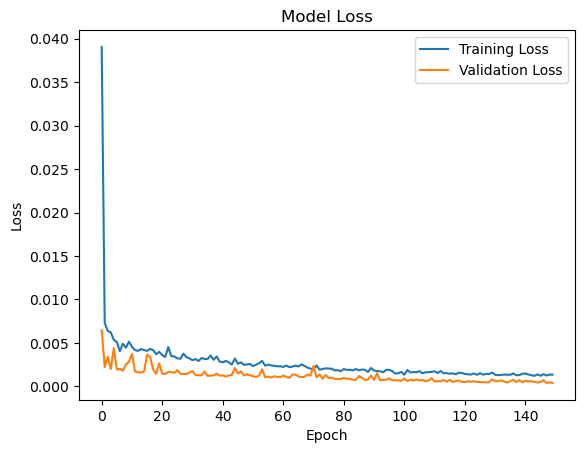

In [11]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()


In [12]:
# Combine training and test data for consistency
total_dataset = pd.concat((train_data['Open'], test_data['Open']), axis=0)

# Prepare inputs for prediction
inputs = total_dataset[len(total_dataset) - len(test_data) - 60:].values
inputs = inputs.reshape(-1, 1)
inputs_scaled = scaler.transform(inputs)

# Create test data structure
X_test = []

for i in range(60, 80):  # Adjust according to test data length
    X_test.append(inputs_scaled[i-60:i, 0])

X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

In [13]:
predicted_stock_price = model.predict(X_test)
predicted_stock_price = scaler.inverse_transform(predicted_stock_price)

1/1 [==============================] - 1s 819ms/step


In [14]:
import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_error

real_stock_price = test_data[['Open']].values

mae = mean_absolute_error(real_stock_price, predicted_stock_price)
rmse = np.sqrt(mean_squared_error(real_stock_price, predicted_stock_price))
mape = np.mean(np.abs((real_stock_price - predicted_stock_price) / real_stock_price)) * 100

print(f"MAE: {mae}")
print(f"RMSE: {rmse}")
print(f"MAPE: {mape}")

MAE: 8.45708557128906
RMSE: 10.639620902458937
MAPE: 1.0411584783252719


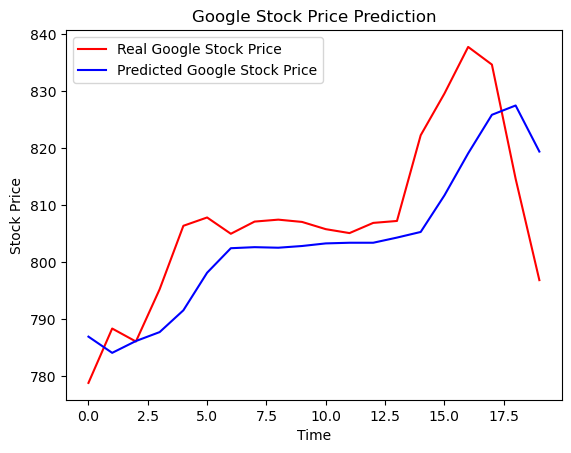

In [15]:
plt.plot(real_stock_price, color='red', label='Real Google Stock Price')
plt.plot(predicted_stock_price, color='blue', label='Predicted Google Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

In [61]:
import tensorflow as tf

np.random.seed(42)
tf.random.set_seed(42)

In [87]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dropout, Dense, Bidirectional

# Load the training data
train_data = pd.read_csv('Google_Stock_Price_Train.csv', thousands=',')

# Include additional features
features = ['Open', 'High', 'Low', 'Close', 'Volume']
training_set = train_data[features].values

# Feature Scaling
scaler = MinMaxScaler(feature_range=(0, 1))
training_set_scaled = scaler.fit_transform(training_set)

# Creating a data structure with 60 timesteps and multiple features
timesteps = 60
X_train = []
y_train = []

for i in range(timesteps, len(training_set_scaled)):
    X_train.append(training_set_scaled[i - timesteps:i])
    y_train.append(training_set_scaled[i, 0])  # Predicting 'Open' price

X_train, y_train = np.array(X_train), np.array(y_train)

# Check the shape of X_train
print("Shape of X_train:", X_train.shape)  # Should be (samples, 60, 5)

# Build the model
model = Sequential()

# First Bidirectional LSTM layer
model.add(Bidirectional(
    LSTM(units=128, return_sequences=True),
    input_shape=(X_train.shape[1], X_train.shape[2])
))
model.add(Dropout(0.4))

# Second Bidirectional LSTM layer
model.add(Bidirectional(
    LSTM(units=128, return_sequences=True)
))
model.add(Dropout(0.4))

# Third LSTM layer
model.add(LSTM(units=64))
model.add(Dropout(0.4))

# Output layer
model.add(Dense(units=1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

Shape of X_train: (1198, 60, 5)


In [88]:
print("X_train shape:", X_train.shape)  # Expected: (samples, 60, 5)
print("y_train shape:", y_train.shape)  # Expected: (samples,)

X_train shape: (1198, 60, 5)
y_train shape: (1198,)


In [89]:
input_shape = (X_train.shape[1], X_train.shape[2])  # (60, 5)

In [90]:
# Load the test data
test_data = pd.read_csv('Google_Stock_Price_Test.csv', thousands=',')

# Combine training and test data for consistency
total_dataset = pd.concat((train_data[features], test_data[features]), axis=0)

# Prepare inputs for prediction
inputs = total_dataset[len(total_dataset) - len(test_data) - timesteps:].values
inputs_scaled = scaler.transform(inputs)

# Create test data structure
X_test = []
for i in range(timesteps, len(inputs_scaled)):
    X_test.append(inputs_scaled[i - timesteps:i])

X_test = np.array(X_test)
print("X_test shape:", X_test.shape)  # Should be (number_of_test_samples, 60, 5)

X_test shape: (20, 60, 5)


Epoch 1/150
15/15 [==============================] - 1s 76ms/step - loss: 8.2481e-04 - val_loss: 7.2631e-04
Epoch 2/150
15/15 [==============================] - 1s 74ms/step - loss: 9.2569e-04 - val_loss: 3.0431e-04
Epoch 3/150
15/15 [==============================] - 1s 73ms/step - loss: 8.2663e-04 - val_loss: 4.9508e-04
Epoch 4/150
15/15 [==============================] - 1s 74ms/step - loss: 8.9404e-04 - val_loss: 6.0940e-04
Epoch 5/150
15/15 [==============================] - 1s 74ms/step - loss: 8.5605e-04 - val_loss: 2.4268e-04
Epoch 6/150
15/15 [==============================] - 1s 74ms/step - loss: 9.7210e-04 - val_loss: 0.0012
Epoch 7/150
15/15 [==============================] - 1s 74ms/step - loss: 8.4024e-04 - val_loss: 2.7962e-04
Epoch 8/150
15/15 [==============================] - 1s 74ms/step - loss: 7.8400e-04 - val_loss: 2.4769e-04
Epoch 9/150
15/15 [==============================] - 1s 73ms/step - loss: 9.1289e-04 - val_loss: 5.9796e-04
Epoch 10/150
15/15 [============

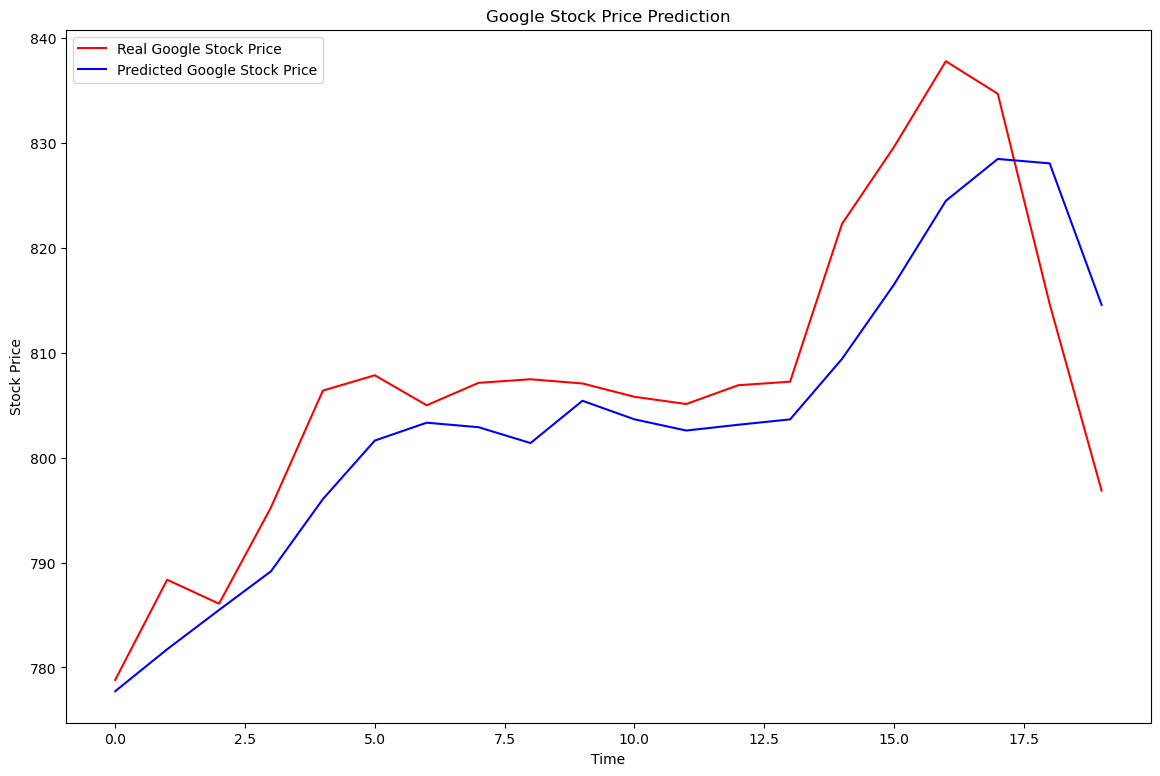

In [103]:
# Early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Train the model
history = model.fit(
    X_train, y_train,
    epochs=150,
    batch_size=64,
    validation_split=0.2,
    callbacks=[early_stopping]
)

# Prepare test data
# Calculate moving averages for test data
test_data['MA7'] = test_data['Open'].rolling(window=7).mean()
test_data['MA14'] = test_data['Open'].rolling(window=14).mean()
test_data.bfill(inplace=True)

total_dataset = pd.concat((train_data[features], test_data[features]), axis=0)

# Prepare inputs for prediction
inputs = total_dataset[len(total_dataset) - len(test_data) - timesteps:].values
inputs_scaled = scaler.transform(inputs)

# Create test data structure
X_test = []
for i in range(timesteps, len(inputs_scaled)):
    X_test.append(inputs_scaled[i - timesteps:i])

X_test = np.array(X_test)
print("Shape of X_test:", X_test.shape)  # Expected: (number_of_test_samples, 60, 7)

feature_scaler = MinMaxScaler()
target_scaler = MinMaxScaler()

# Fit scalers
training_set_scaled = feature_scaler.fit_transform(training_set)
y_train_scaled = target_scaler.fit_transform(y_train.reshape(-1, 1))


# Predict
predicted_stock_price = model.predict(X_test)
predicted_stock_price = scaler.inverse_transform(
    np.concatenate(
        (predicted_stock_price, np.zeros((predicted_stock_price.shape[0], training_set.shape[1]-1))),
        axis=1
    )
)[:, 0]

# Prepare real stock price
real_stock_price = test_data['Open'].values

# Evaluate
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

mae = mean_absolute_error(real_stock_price, predicted_stock_price)
rmse = np.sqrt(mean_squared_error(real_stock_price, predicted_stock_price))
mape = np.mean(np.abs((real_stock_price - predicted_stock_price) / real_stock_price)) * 100

print(f"MAE: {mae}")
print(f"RMSE: {rmse}")
print(f"MAPE: {mape}%")

# Plot the results
plt.figure(figsize=(14,9))
plt.plot(real_stock_price, color='red', label='Real Google Stock Price')
plt.plot(predicted_stock_price, color='blue', label='Predicted Google Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()
